In [1]:
using Pkg
Pkg.activate("")
Pkg.instantiate()

include("src/Cyto.jl")

using PyPlot

my_cmap = PyPlot.get_cmap("magma")
using Plots
using IJulia

using NNlib
using Zygote

  Activating environment at `~/Desktop/projects/cyto/Cyto.jl/Project.toml`
┌ Warning: You are using Matplotlib 3.1.1, which is no longer
│ officialy supported by the Plots community. To ensure smooth Plots.jl
│ integration update your Matplotlib library to a version >= 3.4.0
│ 
│ If you have used Conda.jl to install PyPlot (default installation),
│ upgrade your matplotlib via Conda.jl and rebuild the PyPlot.
│ 
│ If you are not sure, here are the default instructions:
│ 
│ In Julia REPL:
│ ```
│ import Pkg;
│ Pkg.add("Conda")
│ import Conda
│ Conda.update()
│ Pkg.build("PyPlot")
│ ```
│ 
└ @ Plots /home/rlygr/.julia/packages/Plots/5kcBO/src/backends/pyplot.jl:29


In [2]:
orbium = [0,0,0,0,0,0,0.1,0.14,0.1,0,0,0.03,0.03,0,0,0.3,0,0,0,0,
    0,0,0,0,0,0.08,0.24,0.3,0.3,0.18,0.14,0.15,0.16,0.15,0.09,0.2,0,0,0,0,
    0,0,0,0,0,0.15,0.34,0.44,0.46,0.38,0.18,0.14,0.11,0.13,0.19,0.18,0.45,0,0,0, 
    0,0,0,0,0.06,0.13,0.39,0.5,0.5,0.37,0.06,0,0,0,0.02,0.16,0.68,0,0,0, 
    0,0,0,0.11,0.17,0.17,0.33,0.4,0.38,0.28,0.14,0,0,0,0,0,0.18,0.42,0,0, 
    0,0,0.09,0.18,0.13,0.06,0.08,0.26,0.32,0.32,0.27,0,0,0,0,0,0,0.82,0,0, 
    0.27,0,0.16,0.12,0,0,0,0.25,0.38,0.44,0.45,0.34,0,0,0,0,0,0.22,0.17,0, 
    0,0.07,0.2,0.02,0,0,0,0.31,0.48,0.57,0.6,0.57,0,0,0,0,0,0,0.49,0, 
    0,0.59,0.19,0,0,0,0,0.2,0.57,0.69,0.76,0.76,0.49,0,0,0,0,0,0.36,0, 
    0,0.58,0.19,0,0,0,0,0,0.67,0.83,0.9,0.92,0.87,0.12,0,0,0,0,0.22,0.07, 
    0,0,0.46,0,0,0,0,0,0.7,0.93,1,1,1,0.61,0,0,0,0,0.18,0.11, 
    0,0,0.82,0,0,0,0,0,0.47,1,1,0.98,1,0.96,0.27,0,0,0,0.19,0.1, 
    0,0,0.46,0,0,0,0,0,0.25,1,1,0.84,0.92,0.97,0.54,0.14,0.04,0.1,0.21,0.05, 
    0,0,0,0.4,0,0,0,0,0.09,0.8,1,0.82,0.8,0.85,0.63,0.31,0.18,0.19,0.2,0.01, 
    0,0,0,0.36,0.1,0,0,0,0.05,0.54,0.86,0.79,0.74,0.72,0.6,0.39,0.28,0.24,0.13,0, 
    0,0,0,0.01,0.3,0.07,0,0,0.08,0.36,0.64,0.7,0.64,0.6,0.51,0.39,0.29,0.19,0.04,0, 
    0,0,0,0,0.1,0.24,0.14,0.1,0.15,0.29,0.45,0.53,0.52,0.46,0.4,0.31,0.21,0.08,0,0, 
    0,0,0,0,0,0.08,0.21,0.21,0.22,0.29,0.36,0.39,0.37,0.33,0.26,0.18,0.09,0,0,0,
    0,0,0,0,0,0,0.03,0.13,0.19,0.22,0.24,0.24,0.23,0.18,0.13,0.05,0,0,0,0, 
    0,0,0,0,0,0,0,0,0.02,0.06,0.08,0.09,0.07,0.05,0.01,0,0,0,0,0]

orbium = reshape(orbium, (20,20))

# {"name":"Bosco","R":5,"b1":34,"b2":45,"s1":34,"s2":58
bosco = [0 0 0 0 1 0 0 0 0 0; 
    0 0 1 1 1 1 1 0 0 0;
    0 1 1 0 0 1 1 1 1 0; 
    1 1 0 0 0 1 1 1 1 1; 
    1 0 0 0 0 0 1 1 1 1; 
    1 1 0 0 0 0 1 1 1 1; 
    1 1 1 0 1 1 1 1 1 1; 
    0 1 1 1 1 1 1 1 1 0; 
    0 1 1 1 1 1 1 1 0 0; 
    0 0 1 1 1 1 1 0 0 0; 
    0 0 0 1 1 1 0 0 0 0]


wanderer = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0.01 0.01 0.01 0.01 0.01 0.02 0.03 0.04 0.05 0.04 0.01 0 0 0 0 0 0 0 0 0 0;
    0 0 0 0 0 0.02 0.03 0.02 0.01 0.02 0.04 0.04 0.06 0.09 0.10 0.11 0.12 0.05 0.01 0.01 0 0 0 0 0 0 0; 
    0 0 0 0 0.01 0.07 0.07 0.08 0.09 0.09 0.10 0.12 0.20 0.28 0.41 0.58 0.62 0.51 0.30 0.08 0.04 0.01 0 0 0 0 0;
    0 0 0 0.01 0.07 0.03 0.05 0.05 0.06 0.09 0.14 0.21 0.27 0.27 0.14 0.07 0.10 0.28 0.71 0.73 0.28 0.10 0.03 0 0 0 0;
    0 0 0.01 0.01 0.04 0.05 0.04 0.06 0.10 0.16 0.19 0.22 0.07 0.01 0.04 0.03 0.06 0.07 0.07 0.37 0.78 0.47 0.22 0.09 0.01 0 0;
    0 0 0.01 0.01 0.05 0.04 0.06 0.10 0.12 0.17 0.24 0.13 0.05 0.02 0.04 0.07 0.08 0.09 0.07 0.07 0.38 0.74 0.49 0.32 0.12 0 0;
    0 0 0.01 0.01 0.04 0.06 0.07 0.12 0.14 0.19 0.26 0.03 0.05 0.05 0.03 0.09 0.08 0.11 0.13 0.13 0.25 0.47 0.58 0.39 0.31 0.02 0;
    0 0 0 0 0.03 0.10 0.08 0.13 0.15 0.21 0.19 0.05 0.06 0.13 0.02 0.06 0.13 0.19 0.27 0.26 0.32 0.41 0.50 0.39 0.32 0.14 0;
    0 0 0 0 0.03 0.06 0.09 0.12 0.15 0.24 0.04 0.06 0.12 0.18 0.08 0.17 0.05 0.09 0.20 0.26 0.35 0.46 0.49 0.45 0.30 0.21 0;
    0 0 0 0.01 0.01 0.03 0.09 0.11 0.16 0.28 0.08 0.08 0.08 0.09 0.33 0.32 0.44 0.04 0.06 0.14 0.31 0.50 0.59 0.55 0.32 0.21 0;
    0 0 0 0 0.01 0.03 0.09 0.09 0.14 0.21 0 0 0 0.01 0.32 0.32 0.33 0.07 0.06 0.09 0.29 0.58 0.70 0.60 0.34 0.18 0;
    0 0 0 0 0 0.07 0.10 0.08 0.14 0.19 0 0 0.01 0.02 0.03 0.13 0.10 0.07 0.08 0.12 0.39 0.65 0.65 0.54 0.33 0.12 0;
    0 0 0 0 0 0.04 0.15 0.08 0.15 0.30 0.07 0.11 0.13 0.14 0.14 0.12 0.12 0.11 0.12 0.19 0.59 0.61 0.55 0.46 0.29 0.06 0;
    0 0 0 0 0 0 0.08 0.18 0.14 0.40 0.08 0.04 0.06 0.15 0.29 0.27 0.13 0.12 0.14 0.46 0.62 0.51 0.42 0.36 0.25 0.01 0;
    0 0 0 0 0 0 0 0.09 0.19 0.27 0.48 0.07 0.07 0.14 0.27 0.24 0.13 0.12 0.26 0.55 0.55 0.39 0.31 0.28 0.20 0 0; 
    0 0 0 0 0 0 0 0.01 0.12 0.21 0.46 0.48 0.11 0.07 0.08 0.08 0.07 0.10 0.36 0.59 0.50 0.30 0.26 0.27 0.09 0 0;
    0 0 0 0 0 0 0 0 0.01 0.09 0.23 0.45 0.61 0.33 0.08 0.05 0.06 0.19 0.57 0.66 0.40 0.28 0.26 0.26 0 0 0; 
    0 0 0 0 0 0 0 0 0 0 0.01 0.09 0.27 0.62 0.75 0.58 0.55 0.68 0.65 0.46 0.36 0.31 0.29 0.03 0 0 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.03 0.12 0.22 0.28 0.30 0.31 0.29 0.21 0.03 0 0 0 0; 
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.01 0.03 0.05 0.06 0.03 0 0 0 0 0 0]

geminium = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.01 0.02 0.03 0.04 0.04 0.04 0.03 0.02 0 0 0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.04 0.1 0.16 0.2 0.23 0.25 0.24 0.21 0.18 0.14 0.1 0.07 0.03 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.01 0.09 0.2 0.33 0.44 0.52 0.56 0.58 0.55 0.51 0.44 0.37 0.3 0.23 0.16 0.08 0.01 0 0 0 0 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.13 0.29 0.45 0.6 0.75 0.85 0.9 0.91 0.88 0.82 0.74 0.64 0.55 0.46 0.36 0.25 0.12 0.03 0 0 0 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.14 0.38 0.6 0.78 0.93 1.0 1.0 1.0 1.0 1.0 1.0 0.99 0.89 0.78 0.67 0.56 0.44 0.3 0.15 0.04 0 0 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.08 0.39 0.74 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.98 0.85 0.74 0.62 0.47 0.3 0.14 0.03 0 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.32 0.76 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.88 0.75 0.61 0.45 0.27 0.11 0.01 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.35 0.83 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.88 0.73 0.57 0.38 0.19 0.05 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.5 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.99 1.0 1.0 1.0 1.0 0.99 1.0 1.0 1.0 1.0 1.0 1.0 0.85 0.67 0.47 0.27 0.11 0.01;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.55 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.93 0.83 0.79 0.84 0.88 0.89 0.9 0.93 0.98 1.0 1.0 1.0 1.0 0.98 0.79 0.57 0.34 0.15 0.03;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.47 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.9 0.72 0.54 0.44 0.48 0.6 0.7 0.76 0.82 0.91 0.99 1.0 1.0 1.0 1.0 0.91 0.67 0.41 0.19 0.05;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.27 0.99 1.0 1.0 1.0 1.0 0.9 0.71 0.65 0.55 0.38 0.2 0.14 0.21 0.36 0.52 0.64 0.73 0.84 0.95 1.0 1.0 1.0 1.0 1.0 0.78 0.49 0.24 0.07;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.14 0.63 0.96 1.0 1.0 1.0 0.84 0.17 0 0 0 0 0 0 0 0.13 0.35 0.51 0.64 0.77 0.91 0.99 1.0 1.0 1.0 1.0 0.88 0.58 0.29 0.09;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.07 0.38 0.72 0.95 1.0 1.0 1.0 0.22 0 0 0 0 0 0 0 0 0 0.11 0.33 0.5 0.67 0.86 0.99 1.0 1.0 1.0 1.0 0.95 0.64 0.33 0.1;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.32 0.49 0.71 0.93 1.0 1.0 1.0 0.56 0 0 0 0 0 0 0 0 0 0 0 0.1 0.31 0.52 0.79 0.98 1.0 1.0 1.0 1.0 0.98 0.67 0.35 0.11;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.01 0.6 0.83 0.98 1.0 1.0 0.68 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.15 0.38 0.71 0.97 1.0 1.0 1.0 1.0 0.97 0.67 0.35 0.11;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.51 0.96 1.0 1.0 0.18 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.09 0.34 0.68 0.95 1.0 1.0 1.0 1.0 0.91 0.61 0.32 0.1;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.13 0.56 0.99 1.0 1.0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.17 0.45 0.76 0.96 1.0 1.0 1.0 1.0 0.82 0.52 0.26 0.07;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.33 0.7 0.94 1.0 1.0 0.44 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.33 0.68 0.91 0.99 1.0 1.0 1.0 1.0 0.71 0.42 0.19 0.03;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.53 0.89 1.0 1.0 1.0 0.8 0.43 0.04 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.47 0.86 1.0 1.0 1.0 1.0 1.0 0.95 0.58 0.32 0.12 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.77 0.99 1.0 0.97 0.58 0.41 0.33 0.18 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.54 0.95 1.0 1.0 1.0 1.0 1.0 0.8 0.44 0.21 0.06 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.39 0.83 1.0 1.0 0.55 0.11 0.05 0.15 0.22 0.06 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.58 0.99 1.0 1.0 1.0 1.0 1.0 0.59 0.29 0.11 0.01 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.04 0.55 0.81 0.86 0.97 1.0 1.0 0.5 0 0 0.01 0.09 0.03 0 0 0 0 0 0 0 0 0 0 0 0 0 0.26 0.78 1.0 1.0 1.0 1.0 1.0 0.66 0.35 0.13 0.03 0 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.33 1.0 1.0 1.0 1.0 1.0 1.0 0.93 0.11 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.23 0.73 0.95 1.0 1.0 1.0 1.0 1.0 0.62 0.35 0.12 0 0 0 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.51 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.72 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.56 0.25 0.09 0 0 0 0 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.12 0.38 1.0 1.0 1.0 0.66 0.08 0.55 1.0 1.0 1.0 0.03 0 0 0 0 0 0 0 0 0 0 0 0 0 0.35 1.0 1.0 1.0 1.0 1.0 1.0 0.67 0.12 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 0 0 0 0 0 0.6 1.0 1.0 1.0 1.0 1.0 1.0 0.49 0 0 0.87 1.0 0.88 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1.0 1.0 1.0 1.0 1.0 1.0 0.7 0.07 0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 0 0 0.04 0.21 0.48 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0 0 0.04 0.42 0.26 0 0 0 0 0 0 0 0 0 0.12 0.21 0.34 0.58 1.0 1.0 1.0 0.99 0.97 0.99 0.46 0 0 0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 0 0 0.5 1.0 1.0 1.0 1.0 0.96 0 0.31 1.0 1.0 1.0 0.53 0 0 0 0 0 0 0 0 0.2 0.21 0 0 0 0.27 1.0 1.0 1.0 1.0 1.0 1.0 0.87 0.52 0.01 0 0 0 0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 0 0.84 1.0 1.0 1.0 1.0 1.0 0 0 0 0.83 1.0 1.0 0.52 0 0 0 0 0 0 0 0.26 0.82 0.59 0.02 0 0 0.46 1.0 1.0 1.0 1.0 1.0 0.9 0.55 0 0 0 0 0 0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 0.39 0.99 1.0 1.0 1.0 1.0 0.78 0.04 0 0 0 0.93 0.92 0 0 0 0 0 0 0 0 0.69 1.0 1.0 0.36 0 0 1.0 1.0 0.65 0.66 0.97 0.87 0.54 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
    0 0 0 0 0.55 0.75 0.59 0.74 1.0 1.0 0 0 0.75 0.71 0.18 0 0 0 0 0 0 0 0 0 0 0.29 0 0 0.45 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.47 0.39 0.71 0.25 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
    0 0 0 0 0.69 0.81 0.8 0.92 1.0 0.13 0 0 0.13 0.94 0.58 0 0 0 0 0 0 0 0 0 1.0 1.0 0.34 0 0.04 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.24 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
    0 0 0 0 0.63 0.85 0.9 0.98 1.0 0.09 0 0 0.02 1.0 0.64 0 0 0 0 0 0 0 0 0.59 1.0 1.0 0.84 0 0 1.0 1.0 1.0 1.0 1.0 1.0 0.64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;   0 0 0 0 0.64 0.65 0.67 1.0 1.0 0.21 0.01 0 0.04 0.02 0 0 0 0 0 0 0 0 0 0.69 1.0 1.0 1.0 0.29 0.37 1.0 1.0 0.6 0.63 1.0 0.84 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
    0 0 0 0 0.44 0.73 0.73 0.85 1.0 0.97 0.23 0.05 0 0 0 0 0 0 0 0 0.06 0 0 0 0.97 1.0 1.0 1.0 1.0 1.0 1.0 0.33 0.24 0.67 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;   0 0 0 0.12 0.55 0.9 0.9 1.0 1.0 1.0 0.43 0.04 0 0 0 0 0 0 0 0.31 0.54 0 0 0 0.88 1.0 1.0 1.0 1.0 1.0 1.0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
    0 0 0 0.29 0.71 1.0 1.0 1.0 1.0 0.79 0.28 0 0 0 0 0 0 0 0 0.4 0.77 0.54 0 0 0.87 1.0 1.0 1.0 1.0 1.0 0.31 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 
    0 0.16 0.27 0.41 0.72 0.99 1.0 1.0 0.82 0.42 0.09 0 0 0 0 0 0 0 0 0.1 0.55 0.58 0.58 0.77 0.99 1.0 1.0 1.0 1.0 0.63 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
    0.31 0.48 0.45 0.46 0.63 0.88 1.0 0.83 0.59 0.28 0.06 0 0 0 0 0 0 0 0 0 0.32 0.7 0.95 1.0 1.0 1.0 1.0 0.7 0.58 0.12 0.04 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
    0.23 0.54 0.53 0.48 0.57 0.59 0.65 0.63 0.55 0.35 0.13 0.03 0.02 0.09 0.74 1.0 0.09 0 0 0 0.32 0.86 1.0 1.0 1.0 1.0 0.57 0.44 0.31 0.16 0.01 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
    0 0.31 0.45 0.31 0.18 0.28 0.39 0.47 0.54 0.5 0.35 0.2 0.16 0.28 0.75 1.0 0.42 0.01 0 0 0.6 1.0 1.0 1.0 1.0 0.51 0.29 0.09 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0; 
    0 0 0 0 0 0.14 0.3 0.4 0.54 0.71 0.74 0.65 0.49 0.35 0.27 0.47 0.6 0.6 0.72 0.98 1.0 1.0 1.0 1.0 0.65 0.33 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
    0 0 0 0 0 0.06 0.33 0.53 0.69 0.94 0.99 1.0 0.84 0.41 0.16 0.15 0.96 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.73 0.13 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0.42 0.86 0.98 0.98 0.99 1.0 0.94 0.63 0.32 0.62 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.65 0.23 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
    0 0 0 0 0 0.07 0.62 0.95 1.0 1.0 0.99 0.98 0.99 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.98 0.14 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
    0 0 0 0 0 0.03 0.46 0.89 1.0 1.0 0.97 0.83 0.75 0.81 0.94 1.0 1.0 1.0 1.0 0.99 0.03 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0.14 0.57 0.88 0.93 0.81 0.58 0.45 0.48 0.64 0.86 0.97 0.99 0.99 0.42 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 0 0.23 0.45 0.47 0.39 0.29 0.19 0.2 0.46 0.28 0.03 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 0 0 0 0.08 0.22 0.24 0.15 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0;
    0 0 0 0 0 0 0 0 0 0 0 0.07 0.22 0.14 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]



51×55 Matrix{Float64}:
 0.0   0.0   0.0   0.0   0.0   0.0   …  0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.01  0.0   0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.12  0.03  0.0   0.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.3   0.15  0.04  0.0   0.0   0.0
 0.0   0.0   0.0   0.0   0.0   0.0   …  0.47  0.3   0.14  0.03  0.0   0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.61  0.45  0.27  0.11  0.01  0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.73  0.57  0.38  0.19  0.05  0.0
 0.0   0.0   0.0   0.0   0.0   0.0      0.85  0.67  0.47  0.27  0.11  0.01
 0.0   0.0   0.0   0.0   0.0   0.0      0.98  0.79  0.57  0.34  0.15  0.03
 0.0   0.0   0.0   0.0   0.0   0.0   …  1.0   0.91  0.67  0.41  0.19  0.05
 0.0   0.0   0.0   0.0   0.0   0.0      1.0   1.0   0.78  0.49  0.24  0.07
 0.0   0.0   0.0   0.0   0.0   0.0      1.0   1.0   0.88  0.58  0.29  0.09
 ⋮        

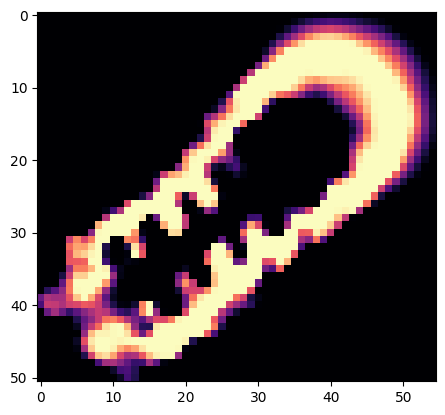

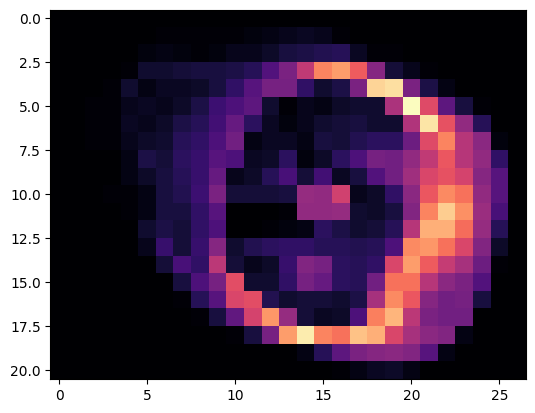

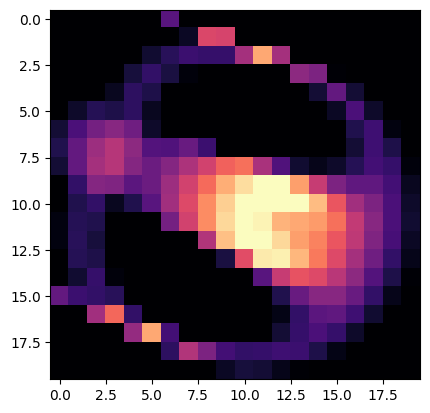

In [3]:
using PyPlot
PyPlot.figure()
PyPlot.imshow(geminium, cmap=my_cmap)
PyPlot.figure()
PyPlot.imshow(wanderer, cmap=my_cmap)
PyPlot.figure()
PyPlot.imshow(orbium, cmap=my_cmap)
PyPlot.show()

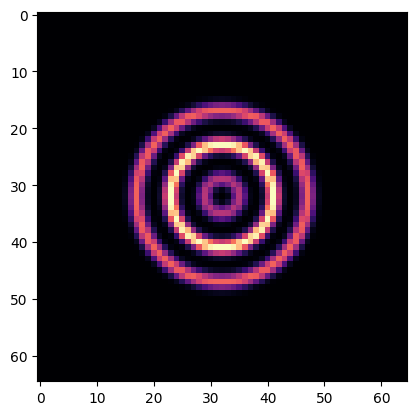

(65, 65)

In [5]:

radius = 32
rr = [sqrt( ((ii - radius - 1).^2 + (jj - radius - 1).^2)) 
            for ii = 1:radius * 2 + 1, jj=1:radius * 2 + 1 ] ./ 6.0

kernel = Cyto.gaussian(rr, 2.5, 0.15) *0.67
kernel .+= Cyto.gaussian(rr, 1.5, 0.15)
kernel .+= Cyto.gaussian(rr, 0.5, 0.15) *0.5 


#kernel = Cyto.gaussian(rr .% 1., 0.5, 0.15)  .* (1.0 .* rr .< 3.0)
kernel = kernel ./ sum(kernel)


PyPlot.figure()
PyPlot.imshow(kernel, cmap=my_cmap)
PyPlot.show()
size(kernel)

┌ Info: Saved animation to 
│   fn = /home/rlygr/Desktop/projects/cyto/Cyto.jl/geminium_ish.gif
└ @ Plots /home/rlygr/.julia/packages/Plots/5kcBO/src/animation.jl:114


Plots.AnimatedGif("/home/rlygr/Desktop/projects/cyto/Cyto.jl/geminium_ish.gif")
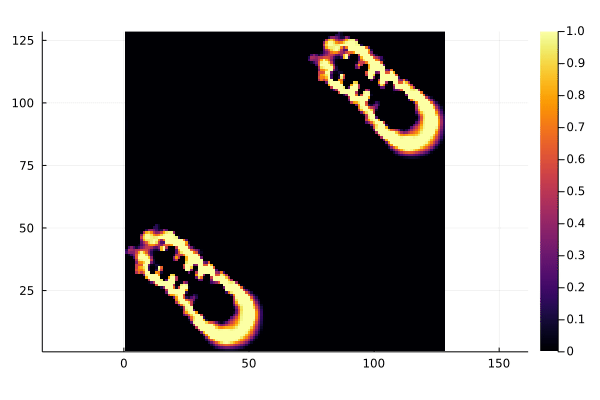

In [6]:
function get_my_conv()

   
radius = 32
    rr = [sqrt( ((ii - radius - 1).^2 + (jj - radius - 1).^2)) 
                for ii = 1:radius * 2 + 1, jj=1:radius * 2 + 1 ] ./ 6.0

    kernel = Cyto.gaussian(rr, 2.5, 0.15) *0.67
    kernel .+= Cyto.gaussian(rr, 1.5, 0.15)
    kernel .+= Cyto.gaussian(rr, 0.5, 0.15) *0.5 

    kernel = kernel ./ sum(kernel)


    
    kernel = reshape(kernel,
            (size(kernel)[1], size(kernel)[2], 1, 1))

    padding = radius
    function my_conv(grid)

            grid = Cyto.circular_pad(grid[:,:,1,1], padding)
            grid = reshape(grid, (size(grid)[1], size(grid)[2], 1, 1))
            conv_grid = NNlib.conv(grid, kernel, pad=0)

            return conv_grid
    end
    
    return my_conv
end

function get_gaussian_mod_conv(mu::Float64=0.0, my_mod::Float64=1.0, sigma::Float64=0.1, radius::Int64=5)


    rr = [sqrt( ((ii - radius - 1).^2 + (jj - radius - 1).^2))
            for ii = 1:radius * 2 + 1, jj=1:radius * 2 + 1 ] ./ radius

    gaussian_kernel = (rr .< radius) .* gaussian(rr .% my_mod, mu, sigma)

    sum_kernel = sum(gaussian_kernel)
    gaussian_kernel = gaussian_kernel ./ sum_kernel
    gaussian_kernel = reshape(gaussian_kernel,
            (size(gaussian_kernel)[1], size(gaussian_kernel)[2], 1, 1))

    padding = radius

    function gaussian_conv(grid)

        grid = circular_pad(grid[:,:,1,1], padding)
        grid = reshape(grid, (size(grid)[1], size(grid)[2], 1, 1))
        conv_grid = NNlib.conv(grid, gaussian_kernel, pad=0)

        return conv_grid
    end

    return gaussian_conv
end


pattern = geminium
grid = zeros(128, 128, 1, 1)  
grid[1:size(pattern)[1], 1:size(pattern)[2], :, :] .= pattern

pattern2 = geminium
grid[end-size(pattern2)[1]+1:end, end-size(pattern2)[2]+1:end, :, :] .= pattern2

universe = Cyto.FloatUniverse(grid)

k_mu = 0.5
k_sigma = 0.15
k_radius = 13
k_mod = 1.0

my_conv = get_my_conv() #Cyto.get_gaussian_mod_conv(k_mu, k_mod, k_sigma, k_radius)

mu = 0.26
sigma = 0.036
params = [1.0, mu, sigma]  

num_steps = 128
anim = @animate for ii = 1:num_steps
    global universe 
    
    universe = Cyto.ca_step(universe, my_conv, Cyto.update_fun,                 
            params, 0.0)  
    my_grid = universe.grid[:,:,1,1]
    heatmap(my_grid, clim=(0,1.0), aspect_ratio = 1)
end
 
gif(anim, "geminium_ish.gif", fps = 30)


<img src="../assets/lenia_wanderer.gif">

<img src="../assets/wanderer.gif">

<img src="../assets/orbium.gif">

In [9]:

radius = 32
rr = [sqrt( ((ii - radius - 1).^2 + (jj - radius - 1).^2)) 
            for ii = 1:radius * 2 + 1, jj=1:radius * 2 + 1 ] ./ 10.0

65×65 Matrix{Float64}:
 4.52548  4.45533  4.38634  4.31856  …  4.31856  4.38634  4.45533  4.52548
 4.45533  4.38406  4.31393  4.245       4.245    4.31393  4.38406  4.45533
 4.38634  4.31393  4.24264  4.17253     4.17253  4.24264  4.31393  4.38634
 4.31856  4.245    4.17253  4.10122     4.10122  4.17253  4.245    4.31856
 4.25206  4.17732  4.10366  4.03113     4.03113  4.10366  4.17732  4.25206
 4.18688  4.11096  4.03609  3.96232  …  3.96232  4.03609  4.11096  4.18688
 4.12311  4.04599  3.96989  3.89487     3.89487  3.96989  4.04599  4.12311
 4.06079  3.98246  3.90512  3.82884     3.82884  3.90512  3.98246  4.06079
 4.0      3.92046  3.84187  3.76431     3.76431  3.84187  3.92046  4.0
 3.94081  3.86005  3.78021  3.70135     3.70135  3.78021  3.86005  3.94081
 3.8833   3.80132  3.72022  3.64005  …  3.64005  3.72022  3.80132  3.8833
 3.82753  3.74433  3.66197  3.5805      3.5805   3.66197  3.74433  3.82753
 3.77359  3.68917  3.60555  3.52278     3.52278  3.60555  3.68917  3.77359
 ⋮     

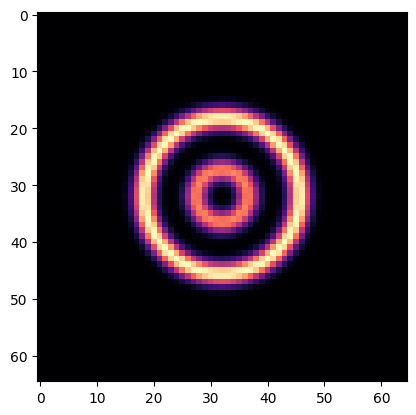

(65, 65)

In [11]:

radius = 32
rr = [sqrt( ((ii - radius - 1).^2 + (jj - radius - 1).^2)) 
            for ii = 1:radius * 2 + 1, jj=1:radius * 2 + 1 ] ./ 9.1

kernel = Cyto.gaussian(rr, 1.5, 0.15)
kernel .+= Cyto.gaussian(rr, 0.5, 0.15) *0.75 


#kernel = Cyto.gaussian(rr .% 1., 0.5, 0.15)  .* (1.0 .* rr .< 3.0)
kernel = kernel ./ sum(kernel)


PyPlot.figure()
PyPlot.imshow(kernel, cmap=my_cmap)
PyPlot.show()
size(kernel)

┌ Info: Saved animation to 
│   fn = /home/rlygr/Desktop/projects/cyto/Cyto.jl/wanderer.gif
└ @ Plots /home/rlygr/.julia/packages/Plots/5kcBO/src/animation.jl:114


Plots.AnimatedGif("/home/rlygr/Desktop/projects/cyto/Cyto.jl/wanderer.gif")
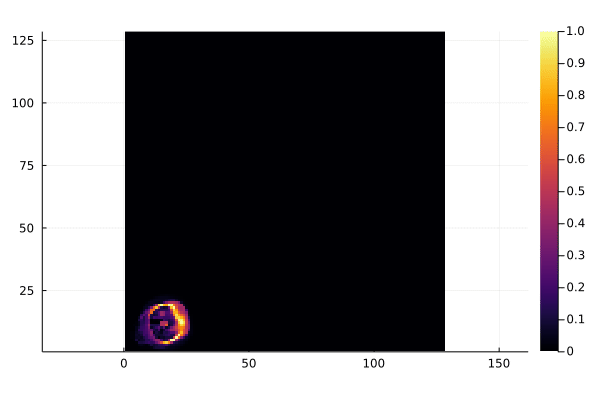

In [12]:
function target_update(universe::Cyto.FloatUniverse, 
        neighborhood::Cyto.FloatUniverse, params::Array{Float64})
    
    U = neighborhood.grid

    temp = Cyto.gaussian(U, params[2], params[3])

    temp = universe.grid .+ 0.05 .* (temp .- universe.grid)

    temp[temp .<= 0.0] .= 0.0
    temp[temp .>= 1.0] .= 1.0

    return Cyto.FloatUniverse(temp)

end
    

function get_my_conv()


    radius = 32
    rr = [sqrt( ((ii - radius - 1).^2 + (jj - radius - 1).^2)) 
                for ii = 1:radius * 2 + 1, jj=1:radius * 2 + 1 ] ./ 9.1

    kernel = Cyto.gaussian(rr, 1.5, 0.15)
    kernel .+= Cyto.gaussian(rr, 0.5, 0.15) * 0.75
    
    kernel .*= (1.0 * rr .< 2.0)

    #kernel = Cyto.gaussian(rr .% 1., 0.5, 0.15)  .* (1.0 .* rr .< 3.0)
    kernel = kernel ./ sum(kernel)
    
    kernel = reshape(kernel,
            (size(kernel)[1], size(kernel)[2], 1, 1))

    padding = radius
    function my_conv(grid)

            grid = Cyto.circular_pad(grid[:,:,1,1], padding)
            grid = reshape(grid, (size(grid)[1], size(grid)[2], 1, 1))
            conv_grid = NNlib.conv(grid, kernel, pad=0)

            return conv_grid
    end
    
    return my_conv
end

pattern = wanderer
grid = zeros(128, 128, 1, 1)  
grid[1:size(pattern)[1], 1:size(pattern)[2], :, :] .= pattern .* 1.5

#pattern2 = geminium
#grid[end-size(pattern2)[1]+1:end, end-size(pattern2)[2]+1:end, :, :] .= pattern2

universe = Cyto.FloatUniverse(grid)

k_mu = 0.5
k_sigma = 0.15
k_radius = 13
k_mod = 1.0

my_conv = get_my_conv() #Cyto.get_gaussian_mod_conv(k_mu, k_mod, k_sigma, k_radius)

mu = 0.1
sigma = 0.005
params = [1.0, mu, sigma]  

num_steps = 768
anim = @animate for ii = 1:num_steps
    global universe 
    
    universe = Cyto.ca_step(universe, my_conv, target_update,                 
            params, 0.0)  
    my_grid = universe.grid[:,:,1,1]
    heatmap(my_grid, clim=(0, 1.0), aspect_ratio = 1)
end
 
gif(anim, "wanderer.gif", fps = 30)


┌ Info: Saved animation to 
│   fn = /home/rlygr/Desktop/projects/cyto/Cyto.jl/wanderer.gif
└ @ Plots /home/rlygr/.julia/packages/Plots/5kcBO/src/animation.jl:114


Plots.AnimatedGif("/home/rlygr/Desktop/projects/cyto/Cyto.jl/wanderer.gif")
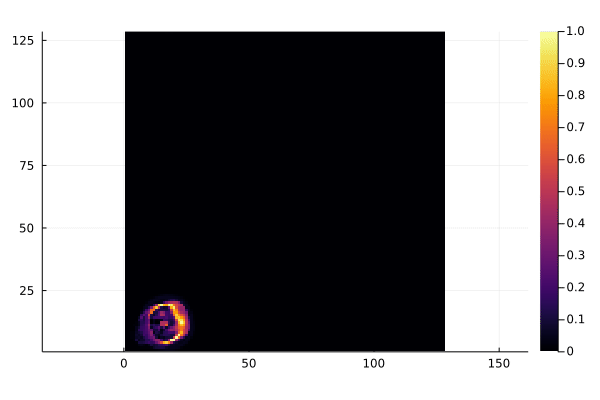

In [13]:
function target_update(universe::Cyto.FloatUniverse, 
        neighborhood::Cyto.FloatUniverse, params::Array{Float64})
    
    U = neighborhood.grid

    temp = Cyto.gaussian(U, params[2], params[3])

    temp = universe.grid .+ 0.05 .* (temp .- universe.grid)

    temp[temp .<= 0.0] .= 0.0
    temp[temp .>= 1.0] .= 1.0

    return Cyto.FloatUniverse(temp)

end
    

function get_my_conv()


    radius = 32
    rr = [sqrt( ((ii - radius - 1).^2 + (jj - radius - 1).^2)) 
                for ii = 1:radius * 2 + 1, jj=1:radius * 2 + 1 ] ./ 9.1

    kernel = Cyto.gaussian(rr, 1.5, 0.15)
    kernel .+= Cyto.gaussian(rr, 0.5, 0.15) #* 0.75
    
    kernel .*= (1.0 * rr .< 2.0)

    #kernel = Cyto.gaussian(rr .% 1., 0.5, 0.15)  .* (1.0 .* rr .< 3.0)
    kernel = kernel ./ sum(kernel)
    
    kernel = reshape(kernel,
            (size(kernel)[1], size(kernel)[2], 1, 1))

    padding = radius
    function my_conv(grid)

            grid = Cyto.circular_pad(grid[:,:,1,1], padding)
            grid = reshape(grid, (size(grid)[1], size(grid)[2], 1, 1))
            conv_grid = NNlib.conv(grid, kernel, pad=0)

            return conv_grid
    end
    
    return my_conv
end

pattern = wanderer
grid = zeros(128, 128, 1, 1)  
grid[1:size(pattern)[1], 1:size(pattern)[2], :, :] .= pattern .* 1.5

#pattern2 = geminium
#grid[end-size(pattern2)[1]+1:end, end-size(pattern2)[2]+1:end, :, :] .= pattern2

universe = Cyto.FloatUniverse(grid)

k_mu = 0.5
k_sigma = 0.15
k_radius = 13
k_mod = 1.0

my_conv = get_my_conv() #Cyto.get_gaussian_mod_conv(k_mu, k_mod, k_sigma, k_radius)

mu = 0.1
sigma = 0.005
params = [1.0, mu, sigma]  

num_steps = 512
anim = @animate for ii = 1:num_steps
    global universe 
    
    universe = Cyto.ca_step(universe, my_conv, target_update,                 
            params, 0.0)  
    my_grid = universe.grid[:,:,1,1]
    heatmap(my_grid, clim=(0, 1.0), aspect_ratio = 1)
end
 
gif(anim, "wanderer.gif", fps = 30)


In [ ]:
count = 0
saved_patterns = []
mask_rate = 0.25
scaler = 0.65
mask_radius = 24
dim = 96
radius = dim / 2
rr = [sqrt.((xx .- radius).^2 + (yy .- radius).^2) for xx = 1:dim, yy = 1:dim]

In [ ]:
for ii = 1:120
    count += 1

    grid = scaler .* rand(dim, dim ) .* (rand(dim,dim) .> mask_rate )
    grid[rr .> mask_radius] .= 0.0
    
    grid = reshape(grid, (dim, dim, 1, 1))
    universe = Cyto.FloatUniverse(grid)

    k_mu = 0.5
    k_sigma = 0.15
    k_radius = 13
    my_conv = Cyto.get_gaussian_conv(k_mu, k_sigma, k_radius)

    mu = 0.145
    sigma = 0.0135
    params = [1.0, mu, sigma]  

    num_steps = 128
    anim = @animate for ii = 1:num_steps
        #global universe 

        universe = Cyto.ca_step(universe, my_conv, Cyto.update_fun,                 
                params, 0.0)  
        my_grid = universe.grid[:,:,1,1]
        heatmap(my_grid, clim=(0,1.0), aspect_ratio = 1)
    end
    
    
    
    
    if sum(universe.grid) > 0.0 #&& sum(universe.grid[1:32, 1:32]) == 0
        println("cool pattern at $count ?")
        push!(saved_patterns, grid)
        gif(anim, "lenia_$count.gif", fps = 30)ww2s
    end
    
end

In [ ]:
sum(universe.grid) > 0.0 && sum(universe.grid[1:32, 1:32]) == 0

In [ ]:
PyPlot.figure()
PyPlot.imshow(Cyto.gaussian(rr .% .500, 0.25, 0.075)  .* (1.0 .* rr .< 1.5))
PyPlot.colorbar()
PyPlot.show()

In [ ]:
saved_patterns = []
push!(saved_patterns, reshape(grid, (64,64)))

In [ ]:
size(saved_patterns[1])

In [ ]:
? append!

In [ ]:
append!(saved_patterns), grid)

In [7]:
function get_my_conv()

   
radius = 32
    rr = [sqrt( ((ii - radius - 1).^2 + (jj - radius - 1).^2)) 
                for ii = 1:radius * 2 + 1, jj=1:radius * 2 + 1 ] ./ 6.0

    rrr = rr .+ 1
    rrr[rr .> 2.0] .= 2
    rrr[rr .<= 2.0] = round.(1 .+ rr[rr .<= 2.0]) 


    bb = [b[rrrr] for rrrr in Int64.(rrr)]
    kernel = bb .* Cyto.gaussian(rr .% 1., 0.5, 0.15)  .* (1.0 .* rr .< 3.0)
    kernel = kernel ./ sum(kernel)
    
    kernel = reshape(kernel,
            (size(kernel)[1], size(kernel)[2], 1, 1))

    padding = radius
    function my_conv(grid)

            grid = Cyto.circular_pad(grid[:,:,1,1], padding)
            grid = reshape(grid, (size(grid)[1], size(grid)[2], 1, 1))
            conv_grid = NNlib.conv(grid, kernel, pad=0)

            return conv_grid
    end
    
    return my_conv
end

function get_gaussian_mod_conv(mu::Float64=0.0, my_mod::Float64=1.0, sigma::Float64=0.1, radius::Int64=5)


    rr = [sqrt( ((ii - radius - 1).^2 + (jj - radius - 1).^2))
            for ii = 1:radius * 2 + 1, jj=1:radius * 2 + 1 ] ./ radius

    gaussian_kernel = (rr .< radius) .* gaussian(rr .% my_mod, mu, sigma)

    sum_kernel = sum(gaussian_kernel)
    gaussian_kernel = gaussian_kernel ./ sum_kernel
    gaussian_kernel = reshape(gaussian_kernel,
            (size(gaussian_kernel)[1], size(gaussian_kernel)[2], 1, 1))

    padding = radius

    function gaussian_conv(grid)

        grid = circular_pad(grid[:,:,1,1], padding)
        grid = reshape(grid, (size(grid)[1], size(grid)[2], 1, 1))
        conv_grid = NNlib.conv(grid, gaussian_kernel, pad=0)

        return conv_grid
    end

    return gaussian_conv
end



get_gaussian_mod_conv (generic function with 5 methods)

In [8]:

pattern = geminium
grid = zeros(128, 128, 1, 1)  
grid[1:size(pattern)[1], 1:size(pattern)[2], :, :] .= pattern

universe = Cyto.FloatUniverse(grid)

k_mu = 0.5
k_sigma = 0.15
k_radius = 13
k_mod = 1.0

my_conv = get_my_conv() #Cyto.get_gaussian_mod_conv(k_mu, k_mod, k_sigma, k_radius)

mu = 0.26
sigma = 0.036
params = [1.0, mu, sigma]  

num_steps = 1024
anim = @animate for ii = 1:num_steps`
    global universe 
    
    universe = Cyto.ca_step(universe, my_conv, Cyto.update_fun,                 
            params, 0.0)  
    my_grid = universe.grid[:,:,1,1]
    heatmap(my_grid, clim=(0,1.0), aspect_ratio = 1)
end
 
gif(anim, "geminium_ish.gif", fps = 30)

LoadError: UndefVarError: b not defined